In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

adult_train_df = pd.read_csv('./adult_training.csv', names=columns)
adult_test_df = pd.read_csv('./adult_test.csv', names=columns, skiprows=1)

In [28]:
adult_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
adult_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   fnlgwt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education num   16281 non-null  int64 
 5   Marital Status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital Gain    16281 non-null  int64 
 11  Capital Loss    16281 non-null  int64 
 12  Hours/Week      16281 non-null  int64 
 13  Native country  16281 non-null  object
 14  Income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [30]:
adult_train_df.replace(' ?', np.nan, inplace=True)
adult_test_df.replace(' ?', np.nan, inplace=True)

In [31]:
adult_train_df.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

In [32]:
adult_test_df.isnull().sum()

Age                 0
Workclass         963
fnlgwt              0
Education           0
Education num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native country    274
Income              0
dtype: int64

In [34]:
adult_train_df['Income'] = adult_train_df['Income'].apply(lambda x: 1 if x==' >50K' else 0)
adult_test_df['Income'] = adult_test_df['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

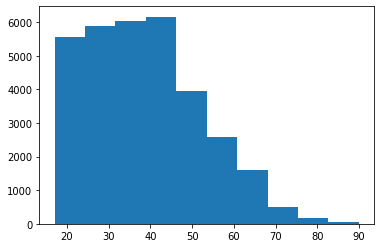

In [36]:
plt.hist(adult_train_df['Age']);